<a href="https://colab.research.google.com/github/cahcharm/Neuro-and-Complexity-Science/blob/CSHA-summer-course/Neuro_Models/2_1_conductance_neuron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conductance-based Neuron Model

In [ ]:
import numpy as np
import brainpy as bp
import matplotlib.pyplot as plt

## Hodgkin–Huxley model 

$$ C \frac{dV}{dt} = -(\bar{g}_{Na} m^3 h (V - E_{Na}) + \bar{g}_K n^4(V - E_K) + g_{leak}(V - E_{leak})) + I(t) $$

$$\frac{dx}{dt} = \alpha_x(1-x) - \beta_x , x \in \{ Na, K, leak \} $$

HH model introduces three gating variables $m$, $n$ and $h$ to control the open/close state of ion channels. To be accurate, variables $m$ and $h$ control the state of Na+ ion channel, and variable $n$ control the state of K+ ion channel. Gating variable dynamics can be expressed in Markov-like form, in which $\alpha_x$ refers to the activation rate of gating variable $x$, and $\beta_x$ refers to the de-activation rate of $x$. The expressions of $\alpha_x$ and $\beta_x$ (as shown in equations below) are fitted by experimental data.

$$ \alpha_m(V) = \frac{0.1(V+40)}{1 - exp(\frac{-(V+40)}{10})}$$

$$ \beta_m(V) = 4.0 exp(\frac{-(V+65)}{18})$$

$$ \alpha_h(V) = 0.07 exp(\frac{-(V+65)}{20})$$

$$ \beta_h(V) = \frac{1}{1 + exp(\frac{-(V + 35)}{10})}$$

$$ \alpha_n(V) = \frac{0.01(V+55)}{1 - exp(\frac{-(V+55)}{10})}$$

$$ \beta_n(V) = 0.125 exp(\frac{-(V+65)}{80})$$

where $E_{Na}=50.\, mV$, $g_{Na}=120.\, mS/cm^2$, $E_K=-77.\, mV$, $g_K=36.\, mS/cm^2$, $E_L=-54.387\, mV$, $g_L=0.03\, mS/cm^2$, $V_{th}=20.\, mV$, $C=1.0 \, \mu F /cm^2$.

In [ ]:
alpha_m = lambda V: 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
beta_m = lambda V: 4.0 * np.exp(-(V + 65) / 18)
alpha_h = lambda V: 0.07 * np.exp(-(V + 65) / 20.)
beta_h = lambda V: 1 / (1 + np.exp(-(V + 35) / 10))
alpha_n = lambda V: 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
beta_n = lambda V: 0.125 * np.exp(-(V + 65) / 80)

### Time Constant

In [ ]:
def plot_tau():
  fig, gs = bp.visualize.get_figure(1, 3, 4, 4)

  vs = np.arange(-100, 100, 0.1)

  fig.add_subplot(gs[0, 0])
  # plt.plot(vs, )
  plt.title(r'$\tau_m$')
  plt.xlabel('Potential [mV]')

  fig.add_subplot(gs[0, 1])
  # plt.plot(vs, ))
  plt.title(r'$\tau_h$')
  plt.xlabel('Potential [mV]')

  fig.add_subplot(gs[0, 2])
  # plt.plot(vs, )
  plt.title(r'$\tau_n$')
  plt.xlabel('Potential [mV]')

  plt.show()

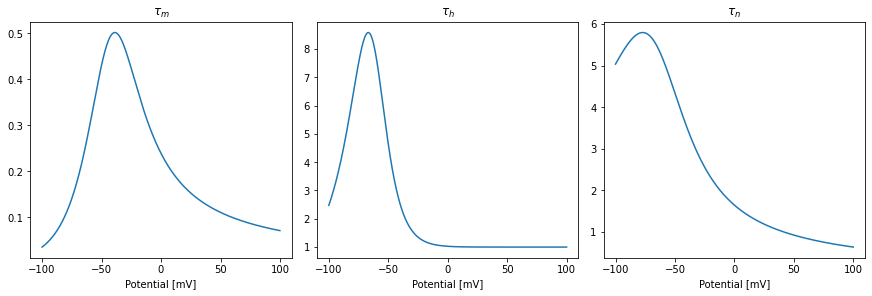

In [ ]:
plot_tau()

### Steady State

In [ ]:
def plot_inf():
  fig, gs = bp.visualize.get_figure(1, 3, 4, 4)

  vs = np.arange(-100, 100, 0.1)

  fig.add_subplot(gs[0, 0])
  # plt.plot(vs, )
  plt.title(r'$m_\infty$')
  plt.xlabel('Potential [mV]')

  fig.add_subplot(gs[0, 1])
  # plt.plot(vs, )
  plt.title(r'$h_\infty$')
  plt.xlabel('Potential [mV]')

  fig.add_subplot(gs[0, 2])
  # plt.plot(vs, )
  plt.title(r'$n_\infty$')
  plt.xlabel('Potential [mV]')

  plt.show()

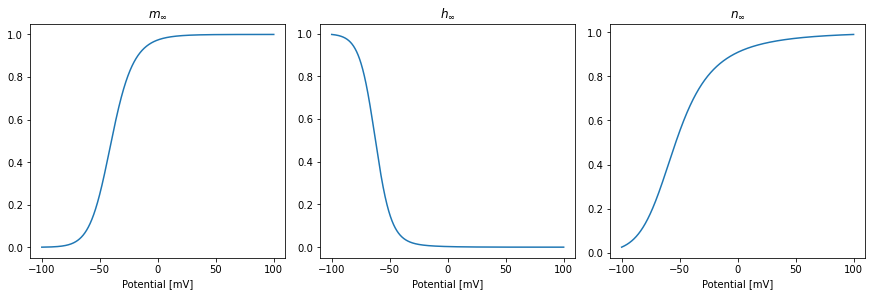

In [ ]:
plot_inf()

### Conductance

In [ ]:
def plot_conductance(gNa=120., gK=36.):
  fig, gs = bp.visualize.get_figure(1, 3, 4, 4)

  vs = np.arange(-100, 100, 0.1)

  m = alpha_m(vs) / (alpha_m(vs) + beta_m(vs))
  h = alpha_h(vs) / (alpha_h(vs) + beta_h(vs))
  n = alpha_n(vs) / (alpha_n(vs) + beta_n(vs))

  fig.add_subplot(gs[0, 0])
  # plt.plot(vs, )
  plt.title(r'$g_{Na}$')

  fig.add_subplot(gs[0, 1])
  # plt.plot(vs, )
  plt.title(r'$g_{K}$')

  fig.add_subplot(gs[0, 2])
  # plt.plot(vs, )
  # plt.plot(vs, )
  plt.title(r'$g_{K}$ & $g_{Na}$')
  plt.legend()

  plt.show()

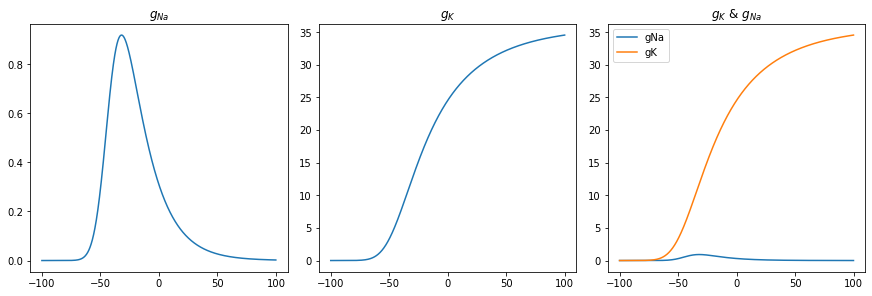

In [ ]:
plot_conductance()

### Simulation

In [ ]:
bp.backend.set(dt=0.05)

In [ ]:
class HH(bp.NeuGroup):
  """Hodgkin–Huxley neuron model."""

  # code here ...

In [ ]:
hh = HH(1, monitors=['V', 'm', 'h', 'n'])

hh.run(100., inputs=('input', 10.), report=True)

Compilation used 0.0000 s.
Start running ...
Run 10.0% used 0.015 s.
Run 20.0% used 0.029 s.
Run 30.0% used 0.043 s.
Run 40.0% used 0.058 s.
Run 50.0% used 0.071 s.
Run 60.0% used 0.085 s.
Run 70.0% used 0.099 s.
Run 80.0% used 0.117 s.
Run 90.0% used 0.131 s.
Run 100.0% used 0.148 s.
Simulation is done in 0.148 s.



0.14802789688110352

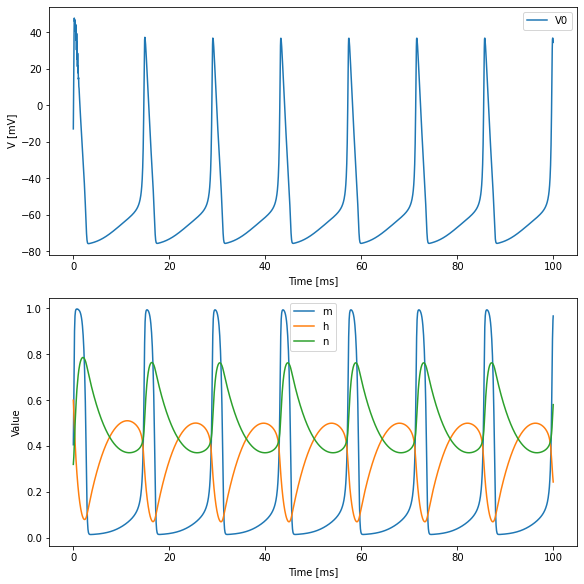

In [ ]:
fig, gs = bp.visualize.get_figure(2, 1, 4, 8)

fig.add_subplot(gs[0, 0])
# plt.plot(, label='V0')
plt.xlabel('Time [ms]')
plt.ylabel('V [mV]')
plt.legend()

fig.add_subplot(gs[1, 0])
# plt.plot( , label='m')
# plt.plot( , label='h')
# plt.plot( , label='n')
plt.xlabel('Time [ms]')
plt.ylabel('Value')
plt.legend()

plt.show()

## Thalamic Reticular Nucleus Neuron Model

The neuron of Thalamic Reticular Nucleus (TRN) [1] is known has the ability to produce the rebound bursting.

1. Bazhenov, M., Timofeev, I., Steriade, M., & Sejnowski, T. J. (1999). Self–sustained rhythmic activity in the thalamic reticular nucleus mediated by depolarizing GABA A receptor potentials. Nature neuroscience, 2(2), 168-174.

### Model description

**Membrane Potential**

The membrane potentials of RE neurons are governed by the equations

$$
C_{m} \frac{d V_{RE}}{d t}=-g_{L}\left(V_{RE}-E_{L}\right)-I_{Na}-I_{K}-I_{T}-I_{KL}-I_{ext}
$$

The passive parameters are $C_m$ = 1 $\mu F/cm^2$ . The area of RE cell was 
$S = 1.43 * 10^{-4} \, cm^2$.

**Ion Channels**

The voltage-dependent ionic currents $I_{Na}$ , $I_K$, $I_T$ are described by equation

$$
I_{j}^{int}=g_{j} m^{M} h^{N}\left(V-E_{j}\right)
$$

where the maximal conductances and reverse potentials are 

- $g_T$ = 2.0 $mS/cm^2$ , 
- $g_{Na}$ = 100 $mS/cm^2$, 
- $g_K$ = 10 $mS/cm^2$,
- $E_{Na}$ = 50 mV,
- $E_{K}$ = -95 mV,
- $E_{Ca}$ = 120 mV.

**Channel Gates**

The gating variables $0 \leq m(t), h(t) \leq 1$ satisfy

$$
\dot{m}=\left[m_{\infty}(V)-m\right] / \tau_{ m }(V),  \\
\dot{h}=\left[h_{\infty}(V)-h\right] / \tau_{ h }(V)
$$

where $m_{\infty}(V), h_{\infty}(V), \tau_{ m }(V),$ and $\tau_{ h }(V)$ are 
nonlinear functions of $V$ extracted from experimental recordings of ionic 
currents. Gating kinetics was adjusted to $36^{\circ} C$.

**$I_{Na}$ current**

$$
\begin{aligned}
I_{Na} &= \bar{g}_{Na}m^3h(V-E_{Na}) \\
dm/dt &= (m_{\infty}(V) - m)/\tau_m(V) \\
\tau_m &= {1 \over Q (\alpha + \beta)} \\
m_{\infty} &= {\alpha \over \alpha + \beta} \\
\alpha &= {0.32 \cdot (13 - V + Vt) \over exp[(13-V + Vt)/4]-1} \\
\beta &= {0.28 \cdot (V - Vt -40) \over exp[(V - Vt -40)/5] -1} \\
dh /dt &= (h_{\infty}(V) - h) / \tau_h(V) \\
\tau_h &= {1 \over Q (\alpha + \beta)} \\
h_{\infty} &= \alpha / (\alpha + \beta) \\
\alpha &= 0.128 \cdot exp[(17 - V + Vt)/18] \\
\beta &= {4 \over 1 + exp[(40 - V + Vt)/5]}
\end{aligned}
$$

where $Q=3^{(T-24)/10}$ is a temperature dependent factor, $Vt = -55$ mV.

**$I_{K}$ current**


$$
\begin{aligned}
I_{K} &= \bar{g}_K n^4 (V-E_K) \\
dn/dt &= (n_{\infty}(V) - n)/\tau_n(V) \\
\tau_n &= {1 \over Q(\alpha + \beta)} \\
n_{\infty} &= \alpha / (\alpha + \beta) \\
\alpha &= {0.032 \cdot (15- V + Vt) \over \exp[(15 - V + Vt)/5]-1} \\
\beta &= 0.5 \cdot \exp[(10-V + Vt)/40]
\end{aligned}
$$

where $Q=3^{(T-24)/10}$ is a temperature dependent factor, $Vt = -55$ mV.

**$I_{T}$ current**

The $I_{T}$ current for RE cells has (Destexhe et al. $1996 b$; Huguenard and Prince 1992) 
$M=2, N=1$, 

$$
\begin{aligned}
I_T &= g_Tp^2q(V-E_T) \\
dp/dt &= (p_{\infty}(V) - p) / \tau_p(V) \\
dq/dt &= (q_{\infty}(V) - q) / \tau_q(V) \\
p_{\infty}(V) &= {1 \over 1+\exp\left[(-52 -V + V_{th}^T)/ 7.4\right]} \\
q_{\infty}(V) &= {1 \over 1+\exp\left[(-80-V+V_{th}^T) / -5\right]} \\
\tau_{ p }(V) &= \left[3+{1 \over \exp\left[(V+27-V_{th}^T)/10\right]+\exp\left[-(V+102-V_{th}^T) / 15\right]}\right] / \phi_p  \\
\tau_{ q }(V) &= \left[ 85+ {1 \over \exp\left[(V+48-V_{th}^T)/4\right]+\exp\left[-(V+407-V_{th}^T) / 50\right]} \right] / \phi_q 
\end{aligned}
$$

where $g_T=2.0 \, \mathrm{mS/cm^2}$, $V_{th}^T=-3 \, \mathrm{mV}$, the temperature constants $\phi_p=5^{(T-24)/10}$ and $\phi_q=3^{(T-24)/10}$.

**$I_{KL}$ current**

The leak potassium $I_{KL}$ current (McCormick and Huguenard 1992 ) is 

$$
I_{ KL }=g_{ KL }\left(V-E_{ K}\right)
$$ 

where $g_{ KL }=0.005 mS / cm ^{2}$ for RE cell.

**$I_{L}$ current**

The leak $I_{L}$ current (McCormick and Huguenard 1992) is 

$$
I_{ KL }=g_{ KL }\left(V-E_{ K}\right)
$$ 

$g_L$ = 0.05 $mS/cm^2$, $E_L$ = -77 mV (Destexhe et al. 1994a). 

### Simulation

In [ ]:
T = 36.

# parameters of INa, IK
g_Na = 100.
E_Na = 50.
g_K = 10.
phi_m = phi_h = phi_n = 3 ** ((T - 36) / 10)

# parameters of IT
E_T = 120.
phi_p = 5 ** ((T - 24) / 10)
phi_q = 3 ** ((T - 24) / 10)
p_half, p_k = -52., 7.4
q_half, q_k = -80., -5.

# parameters of V
C, Vth, area = 1., 20., 1.43e-4
V_factor = 1e-3 / area

# other parameters
E_KL = -95.
E_L = -77.

In [ ]:
class TRN(bp.NeuGroup):
  target_backend = 'general'

  # Code here ......

  def reset(self, Vr):
    self.V[:] = Vr

    alpha = 0.32 * (self.V - self.NaK_th - 13.) / (1 - np.exp(-(self.V - self.NaK_th - 13.) / 4.))
    beta = -0.28 * (self.V - self.NaK_th - 40.) / (1 - np.exp((self.V - self.NaK_th - 40.) / 5.))
    self.m[:] = alpha / (alpha + beta)

    alpha = 0.128 * np.exp(-(self.V - self.NaK_th - 17.) / 18.)
    beta = 4. / (1. + np.exp(-(self.V - self.NaK_th - 40.) / 5.))
    self.h[:] = alpha / (alpha + beta)

    alpha = 0.032 * (self.V - self.NaK_th - 15.) / (1. - np.exp(-(self.V - self.NaK_th - 15.) / 5.))
    beta = 0.5 * np.exp(-(self.V - self.NaK_th - 10.) / 40.)
    self.n[:] = alpha / (alpha + beta)

    self.p[:] = 1. / (1. + np.exp((-self.V + p_half + self.IT_th) / p_k))
    self.q[:] = 1. / (1. + np.exp(-(self.V - q_half - self.IT_th) / q_k))

    self.spike[:] = False
    self.input[:] = 0.

In [ ]:
trn = TRN(1, monitors=['V'])
trn.reset(Vr=-75.)

Iext, duration = bp.inputs.constant_input([(0, 50), (-0.06, 200), (0, 300)])
trn.run(duration, inputs=('input', Iext), report=True)

Compilation used 0.0010 s.
Start running ...
Run 10.0% used 0.507 s.
Run 20.0% used 1.000 s.
Run 30.0% used 1.540 s.
Run 40.0% used 2.094 s.
Run 50.0% used 2.644 s.
Run 60.0% used 3.150 s.
Run 70.0% used 3.650 s.
Run 80.0% used 4.132 s.
Run 90.0% used 4.652 s.
Run 100.0% used 5.136 s.
Simulation is done in 5.136 s.



5.136383771896362

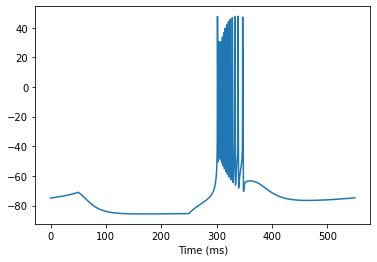

In [ ]:
bp.visualize.line_plot(trn.mon.ts, trn.mon.V)